## В этом ноутбуке:
1. Работаем с датасетом Fashion Mnist
2. Сделаем и обучим модель, которая будет классифицировать объекты из этого датасета. Всего классов 10
3. Посмотрим на более сложную модель, но дающую лучший результат на валидационной выборке
4. Посмотрим что такое Callbacks
5. Сделаем для нашей модели из п.2 Callback-tqdm, Callback для Keras, Callback для сохранения модели и напишем свой произвольный Callback

In [1]:
# Необходимые импорты
from keras import Sequential
import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Reshape, InputLayer, Dropout
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Датасет встроен в Keras, так что его можно легко скачать:

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


В датасете всего 10 классов, перечислим их в списке fashion_mnist_labels:

In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


Также посмотрим на изображения:

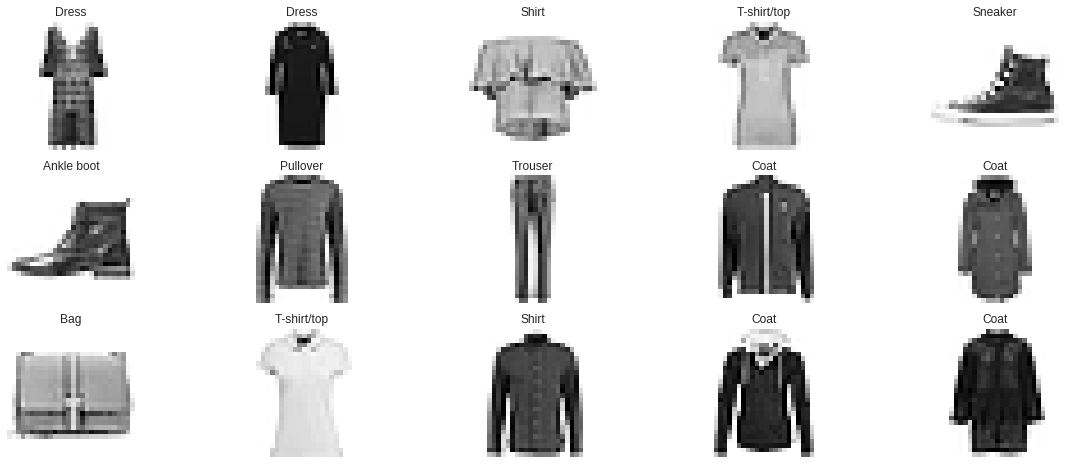

In [4]:
# Печатаем случайно выбранные 15 изображений:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    true_index = y_test[index]
    ax.set_title("{}".format(fashion_mnist_labels[true_index]))

Посмотрим каково число объектов в выборках:

In [5]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Число объектов в обучающей/тестовой выборках:
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


Посмотрим как выглядит y_train/y_test

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

__Вопрос__: Задача классификации, значит что необходимо сделать с y_train/y_test?

In [0]:
# <Your code>

Теперь объявим модель. Можете использовать любые слои и всё, что мы узнали за прошедшую неделю

Модель должна достичь примерно 0.83 accuracy на валидачионной выборке

In [0]:
# <Your code>

In [0]:
# Скомпилировать модель:
# <Your code>

In [0]:
# Сделать fit. 10% выборки отвести под валидационную
# <Your code>

In [0]:
# Оценить качество модели на тестовом наборе:
# <Your code>

In [13]:
#ДЛЯ fashion mint:

model = Sequential()
model.add(InputLayer((28, 28)))
model.add(Reshape((28, 28, -1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))



y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[keras.metrics.categorical_accuracy])

model.fit(x=x_train, y=y_train, epochs=3, batch_size=100, verbose=2,
          validation_split=0.1)

model.evaluate(x=x_test, y=y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/3
 - 10s - loss: 0.7937 - categorical_accuracy: 0.7466 - val_loss: 0.5429 - val_categorical_accuracy: 0.7937
Epoch 2/3
 - 5s - loss: 0.4922 - categorical_accuracy: 0.8224 - val_loss: 0.4499 - val_categorical_accuracy: 0.8293
Epoch 3/3
 - 5s - loss: 0.4333 - categorical_accuracy: 0.8419 - val_loss: 0.4252 - val_categorical_accuracy: 0.8457
10000/10000 [==============================] - 1s 79us/step


[0.462930535531044, 0.8338]

Теперь сделаем небольшую визуализацию того, как работает модель:

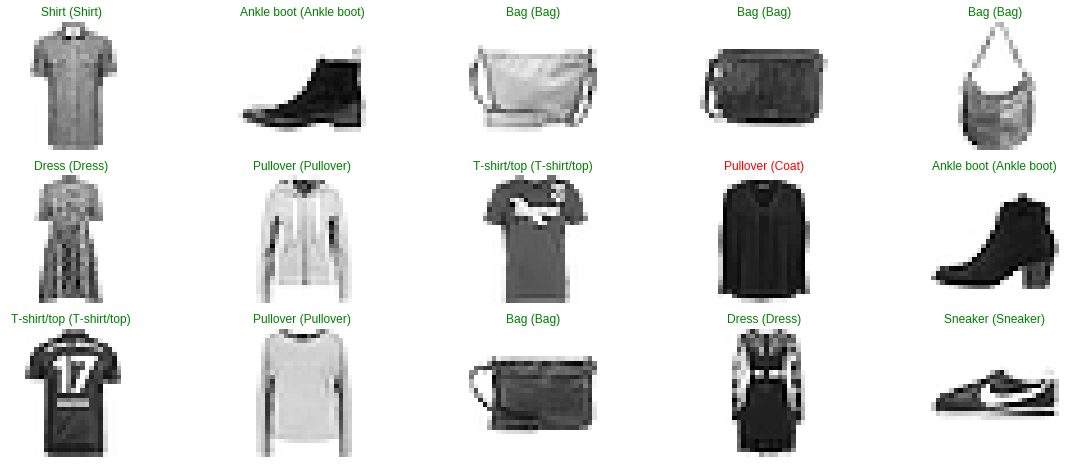

In [14]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Посмотрим теперь только на неверно предсказанные объекты:

In [0]:
y_hat_argmax = np.argmax(y_hat, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)
choose_wrong = ~(y_hat_argmax == y_test_argmax)
y_hat_wrong = y_hat[choose_wrong]
y_test_wrong = y_test[choose_wrong]
x_test_wrong = x_test[choose_wrong]

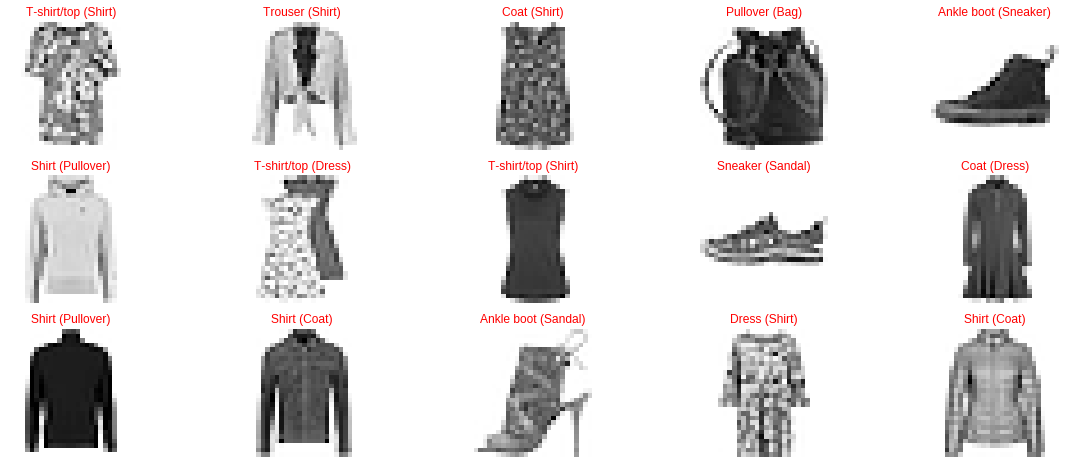

In [16]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(y_hat_wrong.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test_wrong[index]))
    predict_index = np.argmax(y_hat_wrong[index])
    true_index = np.argmax(y_test_wrong[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Наконец, соберем метрики по каждому отдельному классу. Для этого есть метод classification_report в sklearn:

In [17]:
from sklearn.metrics import classification_report
y_test_arg = np.argmax(y_test, axis=1)
y_hat_arg = np.argmax(y_hat, axis=1)

print(classification_report(y_test_arg, y_hat_arg, target_names=fashion_mnist_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.86      0.80      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.68      0.83      0.75      1000
       Dress       0.83      0.86      0.85      1000
        Coat       0.75      0.63      0.69      1000
      Sandal       0.96      0.91      0.93      1000
       Shirt       0.58      0.45      0.50      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.97      0.93      0.95      1000
  Ankle boot       0.94      0.96      0.95      1000

   micro avg       0.83      0.83      0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [0]:
# Другая модель:

In [19]:
from keras.layers import Activation, BatchNormalization, MaxPooling2D
from keras.optimizers import SGD
chanDim = -1
classes = 10
INIT_LR = 1e-2

model = Sequential()
model.add(InputLayer((28, 28)))
model.add(Reshape((28, 28, -1)))

# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

# return the constructed network architecture

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / 30)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [23]:
!pip install keras-tqdm

In [24]:
from keras_tqdm import TQDMNotebookCallback 

model.fit(x=x_train, y=y_train, epochs=30, batch_size=32, verbose=0,
          validation_split=0.1, callbacks=[TQDMNotebookCallback(leave_inner=True)])

KeyboardInterrupt: ignored

Как видно, модель примерно на 5-ой эпохе достигает качества 0.92. А к 10-ой эпохе ~0.93

__Вопрос:__ Почему на некоторых эпохах accuracy < val_accuracy ?

## Кастомные метрики:

In [0]:
import keras.backend as K

def precision(y_true, y_pred):
    """Precision metric.
     Only computes a batch-wise average of precision.
     Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.
     Only computes a batch-wise average of recall.
     Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', precision, recall])

In [26]:
from keras_tqdm import TQDMNotebookCallback

model.fit(x=x_train, y=y_train, epochs=30, batch_size=32, verbose=0,
          validation_split=0.1, callbacks=[TQDMNotebookCallback(leave_inner=True)])

KeyboardInterrupt: ignored

## CallBacks:

__Коллбеки__: это класс, имеющий набор методов on_train_begin, on_train_end, on_epoch_begin, on_epoch_end, on_batch_begin, on_batch_end, которые позволяют выполнять какой-либо код в конце эпохи, в начале эпохи, в конце батча, в начале батча, в конце обучения, в начале обучения

Примеры применения: 
 - Сохранение метрик качества в процессе обучения для онлайн визуализации
 - Отправление в телегреамм/почту метрик качества
 - Сохранение модели в конце каждой эпохи (можно даже после каждого батча)

Примеры реализованных в Керасе коллбеков:

 - EarlyStopping - делает раннюю остановку процесса обучения по некоторому критерию (например, лосс не падает n эпох)

 - ModelCheckpoint - сохраняет модель после каждой эпохи

 - RemoteMonitor - отправляет логи на сервер

 - TensorBoard - сохраняет логи в папки для последующей визуализации в TensorBoard

In [28]:
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping

""" Callbacks """
checkpointer = ModelCheckpoint('..\models\weights.{epoch:02d}-val_loss{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=True, mode='min', period=1)

""" Enable logging for Tensorboard """

# Скоращает learning rate, когда loss не уменьшается несколько эпох подряд:
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=0, mode='auto', min_delta=0.0001, min_lr=0)

# Останавливает обучение по какому либо критерию. Например, loss не уменьшается 3 эпохи подряд
early_stop = EarlyStopping(monitor='val_loss', patience=3)

tqdm = TQDMNotebookCallback(leave_inner=True)


model.fit(x=x_train, y=y_train, epochs=30, batch_size=32, verbose=0,
          validation_split=0.1, callbacks=[checkpointer, reduce, early_stop, tqdm])

KeyboardInterrupt: ignored

Шаблон для своего коллбека:

In [0]:
class My_Callback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        return
 
    def on_train_end(self, logs={}):
        return
 
    def on_epoch_begin(self, logs={}):
        return
 
    def on_epoch_end(self, epoch, logs={}):
        return
 
    def on_batch_begin(self, batch, logs={}):
        return
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        return

### Чуть подробнее остановимся на Callback'е TensorBoard:

In [30]:
from tensorboardcolab import TensorBoardColab
tbc=TensorBoardColab() # генерирует URL
# В fit же передайте объект TensorBoardColabCallback(tbc)


KeyboardInterrupt



Wait for 8 seconds...


KeyboardInterrupt: ignored

Если не открывается URL, то нужно включить VPN. Например, через opera vpn или установить на Chrome расширение (например, Browsec https://chrome.google.com/webstore/detail/browsec-vpn-free-and-unli/omghfjlpggmjjaagoclmmobgdodcjboh)

In [0]:
history = model.fit_generator(generator=train_generator,
                                  steps_per_epoch=STEP_SIZE_TRAIN,
                                  validation_data=valid_generator,
                                  #validation_steps=STEP_SIZE_VALID,
                                  epochs=4,
                                  callbacks=[tbc, tqdm],
                                  verbose=1
                                  )